- **timestamp** - `datetime` the time at which the transaction occurred
- **description** - `string` a variable length string that explains what the transaction represents
- **amount** - `float` the value of transaction

recurring transactions:
- subscriptions
- rent
- weekly lunch

implement: def identify_recurring_transactions(transactions: List[Transaction]) -> List[Transaction.id] 

- wrappable in an API framework to serve real traffic 

In [1]:
import json
import pandas as pd
import numpy as np
import datetime as dt

load data from json (make sure its only transactions)

In [2]:
def read_transactions(filename):
    with open(filename) as f:
        raw_data = json.load(f)

    return raw_data['transactions'] # list_transactions

In [3]:
def to_df(transactions):
    df = pd.DataFrame(transactions)
    df['date'] = pd.to_datetime(df['date'])

    return df

In [4]:
to_df(read_transactions('tests/example.json'))

,description,amount,date
0,Spotify,-14.99,2021-01-29
1,Spotify,-14.99,2020-12-29
2,Spotify,-14.99,2020-11-29
3,Spotify,-14.99,2020-10-29
4,Netflix,-20.00,2020-02-15
5,Netflix,-20.00,2020-03-14
6,Netflix,-20.00,2020-04-16
7,Netflix,-20.00,2020-05-15
8,Aug2020 Acme Corp Salary,4000.00,2020-08-01
9,Sep2020 Acme Corp Salary,4000.00,2020-09-01


In [5]:
all_transactions_df = to_df(read_transactions('tests/example.json'))
all_transactions_df

,description,amount,date
0,Spotify,-14.99,2021-01-29
1,Spotify,-14.99,2020-12-29
2,Spotify,-14.99,2020-11-29
3,Spotify,-14.99,2020-10-29
4,Netflix,-20.00,2020-02-15
5,Netflix,-20.00,2020-03-14
6,Netflix,-20.00,2020-04-16
7,Netflix,-20.00,2020-05-15
8,Aug2020 Acme Corp Salary,4000.00,2020-08-01
9,Sep2020 Acme Corp Salary,4000.00,2020-09-01


a transaction is recurring when:
- amount is same
- same description
- payment dates at same interval for each desc

amount edge cases:
- subscription / rent / salary changes price
- is company lunch always the same price?
- amounts in diff currency

for purpose of challenge:
- first just see if amount shows up multiple times
- operating under assumption that all normalized to be same currency (since currency isnt stated)




In [6]:
def occurences(df):
    df['occurrences'] = df.duplicated('amount', keep=False)
    return df

all_transactions_df = occurences(all_transactions_df)
all_transactions_df

,description,amount,date,occurrences
0,Spotify,-14.99,2021-01-29,True
1,Spotify,-14.99,2020-12-29,True
2,Spotify,-14.99,2020-11-29,True
3,Spotify,-14.99,2020-10-29,True
4,Netflix,-20.00,2020-02-15,True
5,Netflix,-20.00,2020-03-14,True
6,Netflix,-20.00,2020-04-16,True
7,Netflix,-20.00,2020-05-15,True
8,Aug2020 Acme Corp Salary,4000.00,2020-08-01,True
9,Sep2020 Acme Corp Salary,4000.00,2020-09-01,True


assuming this transaction data is not updating in real time:
- so any amounts that show up only once arent recurring
- covers cases when for example spotify increases subscription prices next year
- doesnt cover cases for yearly salary if salary is diff every year
- why is company lunch always 5 - if there is a monthly budget for lunch we could sum all lunch amounts for month and check if under budget. for this case we should look at description matching first to categorize

later:
figure out ordering of categorization -- what feature should be weighed more heavily when looking at edge cases
- client can imput their own weights?

but for sake of time lets just assume if there are outlying transactions it can't be recurring (come back to this if time)

look at grouping desc now

normalizing:
- no date
- case insensitive
- assuming special characters are an input error (so like spotify and spotify! are the same)

https://developers.google.com/edu/python/regular-expressions

- how to deal with diff formatted dates (could be common that dates are included in desc)
- what if there is spotify1 and spotify2? would this count as diff grouping? depends of how clients wants to classify their recurring transactions...
- lets keep the white space cause similar desc would probs have white space in same place? they would have same format?


makes sense in a business use case that desc could have:
- name of product / service / event
- could include date
- could have a category


how to measure similarity??
- nlp
- distance btwn two strings -- lookup formulas
- want to have some sort of similarity score

https://docs.python.org/3/library/difflib.html

'As a rule of thumb, a ratio() value over 0.6 means the sequences are close matches'

- clustering

In [7]:
import re

def normalize_desc(df):

    # date in YYYY-MM-DD format
    df['description'] = df['description'].str.replace(r'\d{4}-\d{2}-\d{2}', '', regex=True)
    
    # date in MonthYYYY format
    df['description'] = df['description'].str.replace(r'\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\d{4}\b', '', regex=True)
    
    # no special characters
    df['description'] = df['description'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
    
    # make all lowercase
    df['description'] = df['description'].str.lower()
    
    return df

normalized_df = normalize_desc(all_transactions_df)
normalized_df

,description,amount,date,occurrences
0,spotify,-14.99,2021-01-29,True
1,spotify,-14.99,2020-12-29,True
2,spotify,-14.99,2020-11-29,True
3,spotify,-14.99,2020-10-29,True
4,netflix,-20.00,2020-02-15,True
5,netflix,-20.00,2020-03-14,True
6,netflix,-20.00,2020-04-16,True
7,netflix,-20.00,2020-05-15,True
8,acme corp salary,4000.00,2020-08-01,True
9,acme corp salary,4000.00,2020-09-01,True


get similarity score and put them all in matrix so all desc are compared to all desc

In [8]:
from difflib import SequenceMatcher

def similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

# list of just the diff desc types
desc_list = normalized_df['description'].tolist()


similarity_matrix = []
for a in desc_list:
    row = []
    for b in desc_list:
        similarity_score = similarity(a, b)
        row.append(similarity_score)
    similarity_matrix.append(row)


similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.000000,1.000000,1.000000,1.000000,0.285714,0.285714,0.285714,0.285714,0.166667,0.166667,...,0.068966,0.148148,0.137931,0.214286,0.148148,0.071429,0.222222,0.315789,0.454545,0.272727
1,1.000000,1.000000,1.000000,1.000000,0.285714,0.285714,0.285714,0.285714,0.166667,0.166667,...,0.068966,0.148148,0.137931,0.214286,0.148148,0.071429,0.222222,0.315789,0.454545,0.272727
2,1.000000,1.000000,1.000000,1.000000,0.285714,0.285714,0.285714,0.285714,0.166667,0.166667,...,0.068966,0.148148,0.137931,0.214286,0.148148,0.071429,0.222222,0.315789,0.454545,0.272727
3,1.000000,1.000000,1.000000,1.000000,0.285714,0.285714,0.285714,0.285714,0.166667,0.166667,...,0.068966,0.148148,0.137931,0.214286,0.148148,0.071429,0.222222,0.315789,0.454545,0.272727
4,0.285714,0.285714,0.285714,0.285714,1.000000,1.000000,1.000000,1.000000,0.166667,0.166667,...,0.137931,0.148148,0.137931,0.142857,0.148148,0.142857,0.444444,0.210526,0.272727,0.272727
5,0.285714,0.285714,0.285714,0.285714,1.000000,1.000000,1.000000,1.000000,0.166667,0.166667,...,0.137931,0.148148,0.137931,0.142857,0.148148,0.142857,0.444444,0.210526,0.272727,0.272727
6,0.285714,0.285714,0.285714,0.285714,1.000000,1.000000,1.000000,1.000000,0.166667,0.166667,...,0.137931,0.148148,0.137931,0.142857,0.148148,0.142857,0.444444,0.210526,0.272727,0.272727
7,0.285714,0.285714,0.285714,0.285714,1.000000,1.000000,1.000000,1.000000,0.166667,0.166667,...,0.137931,0.148148,0.137931,0.142857,0.148148,0.142857,0.444444,0.210526,0.272727,0.272727
8,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.000000,1.000000,...,0.205128,0.216216,0.358974,0.263158,0.270270,0.210526,0.357143,0.344828,0.312500,0.250000
9,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,1.000000,1.000000,...,0.205128,0.216216,0.358974,0.263158,0.270270,0.210526,0.357143,0.344828,0.312500,0.250000


need to see what this looks like im getting confused
https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

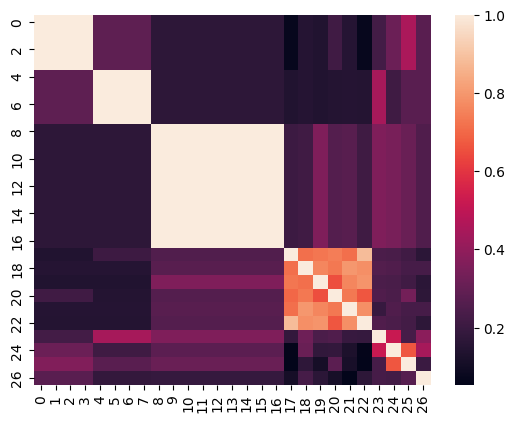

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(similarity_df, annot=False, cbar=True)

so visually we have the groupings
from that python doc above 0.6 we can group together
- but this threshold can be decided by client

how to cluster:
- dict of clusters?
- list of clusters (list)?


In [10]:
clusters = []
for i, row in enumerate(similarity_matrix):
    cluster_found = False
    for cluster in clusters:
        if any(similarity_matrix[i][j] > 0.6 for j in cluster):
            cluster.append(i)
            cluster_found = True
            break
    if not cluster_found:
        clusters.append([i])

clusters

[[0, 1, 2, 3],
 [4, 5, 6, 7],
 [8, 9, 10, 11, 12, 13, 14, 15, 16],
 [17, 18, 19, 20, 21, 22],
 [23],
 [24, 25],
 [26]]

so this is a list of all the groupings
lenght of each sublist if how many big cluster is (how many rows in data is one desc group)

In [11]:
cluster_sizes = [len(sublist) for sublist in clusters]
cluster_sizes

[4, 4, 9, 6, 1, 2, 1]

where we group calculating date diffs so we dont calculate date diff of diff desc

In [12]:
# basicallt do like in sql where windows are the cluster sizes
# and you itartively find date diff in each window

curr = 0
diffs = []

for i in cluster_sizes:
    cluster_dates = normalized_df['date'][curr : curr + i]

    for i in range(1, len(cluster_dates)):
        normalized_df['date_difference'] = normalized_df['date'].diff().abs()
        
    curr += 1

curr = 0

for i in cluster_sizes:
    normalized_df.iat[curr, normalized_df.columns.get_loc('date_difference')] = pd.Timedelta(0)
    curr += i

normalized_df

,description,amount,date,occurrences,date_difference
0,spotify,-14.99,2021-01-29,True,0 days
1,spotify,-14.99,2020-12-29,True,31 days
2,spotify,-14.99,2020-11-29,True,30 days
3,spotify,-14.99,2020-10-29,True,31 days
4,netflix,-20.00,2020-02-15,True,0 days
5,netflix,-20.00,2020-03-14,True,28 days
6,netflix,-20.00,2020-04-16,True,33 days
7,netflix,-20.00,2020-05-15,True,29 days
8,acme corp salary,4000.00,2020-08-01,True,0 days
9,acme corp salary,4000.00,2020-09-01,True,31 days


lets just same date diffs within 5 days are considered the same
- arbitrary
- can change the number of days for leeway

In [14]:
def check_dates_within_range(df, start_index, end_index, days=2):
    cluster = df.loc[start_index:end_index, 'date_difference']
    min_diff = cluster.min()
    df.loc[start_index:end_index, 'within range'] = cluster.apply(lambda x: x if (x - min_diff) <  pd.Timedelta(5) else pd.Timedelta(0))
    
    # if in range itll count as 0 days which means the date delta is the same


curr = 0
for size in cluster_sizes:
    start_index = curr
    end_index = curr + size - 1
    check_dates_within_range(normalized_df, start_index, end_index)
    curr += size

normalized_df

,description,amount,date,occurrences,date_difference,within range
0,spotify,-14.99,2021-01-29,True,0 days,0 days
1,spotify,-14.99,2020-12-29,True,31 days,0 days
2,spotify,-14.99,2020-11-29,True,30 days,0 days
3,spotify,-14.99,2020-10-29,True,31 days,0 days
4,netflix,-20.00,2020-02-15,True,0 days,0 days
5,netflix,-20.00,2020-03-14,True,28 days,0 days
6,netflix,-20.00,2020-04-16,True,33 days,0 days
7,netflix,-20.00,2020-05-15,True,29 days,0 days
8,acme corp salary,4000.00,2020-08-01,True,0 days,0 days
9,acme corp salary,4000.00,2020-09-01,True,31 days,0 days
